In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [41]:
def normalize(X):
    Xmin = np.amin(X)
    Xmax = np.amax(X)
    X = (X-Xmin)/(Xmax-Xmin)
    return X

# Add missing data to ethnicity , relation features

In [42]:
#read csv
autism_data = pd.read_csv("Data_Autism.csv")

In [43]:
autism_data

,"A1_Score {0,1}","A2_Score {0,1}","A3_Score {0,1}","A4_Score {0,1}","A5_Score {0,1}","A6_Score {0,1}","A7_Score {0,1}","A8_Score {0,1}","A9_Score {0,1}","A10_Score {0,1}",age numeric,"gender {f,m}",ethnicity,"jundice {no,yes}","austim {no,yes}","contry_of_res {'United States',Brazil,Spain,Egypt,'New Zealand',Bahamas,Burundi,Austria,Argentina,Jordan,Ireland,'United Arab Emirates',Afghanistan,Lebanon,'United Kingdom','South Africa',Italy,Pakistan,Bangladesh,Chile,France,China,Australia,C","used_app_before {no,yes}",result numeric,relation,"Class/ASD {NO,YES}"
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,?,NO
5,1,1,1,1,1,0,1,1,1,1,36,m,Others,yes,no,United States,no,9,Self,YES
6,0,1,0,0,0,0,0,1,0,0,17,f,Black,no,no,United States,no,2,Self,NO
7,1,1,1,1,0,0,0,0,1,0,64,m,White-European,no,no,New Zealand,no,5,Parent,NO
8,1,1,0,0,1,0,0,1,1,1,29,m,White-European,no,no,United States,no,6,Self,NO
9,1,1,1,1,0,1,1,1,1,0,17,m,Asian,yes,yes,Bahamas,no,8,Health care professional,YES


In [44]:
columns_dont_want = ["ethnicity", "relation","Class/ASD {NO,YES}"]
select = [x for x in autism_data.columns if x not in columns_dont_want]

y_ethnicity = autism_data.loc[:, 'ethnicity']
X_ethnicity = autism_data.loc[:, select]
X_numbers = X_ethnicity.select_dtypes(include=[np.number])

#Give labels and use df.apply() to apply le.fit_transform to all columns
le = preprocessing.LabelEncoder()
X_dataset_ohe = X_ethnicity.select_dtypes(include=[object]).apply(le.fit_transform).values

#Apply one hot encoding to create vector
enc = preprocessing.OneHotEncoder()
enc.fit(X_dataset_ohe)
X_onehotlabels = enc.transform(X_dataset_ohe).toarray()

y_ethnicity = y_ethnicity.values
X_ethnicity = X_onehotlabels
X_ethnicity = np.hstack((X_ethnicity,X_numbers))

In [45]:
x_ethnicityTest = []
y_ethnicityTest = []
x_ethnicityData = []
y_ethnicityData = []
for xi,yi in zip(X_ethnicity,y_ethnicity):
    if(yi=='?'):
        x_ethnicityTest.append(xi)
        y_ethnicityTest.append(yi)
    else:
        x_ethnicityData.append(xi)
        y_ethnicityData.append(yi)
y_ethnicityData = np.array(y_ethnicityData)
x_ethnicityData = np.array(x_ethnicityData)
x_ethnicityTest = np.array(x_ethnicityTest)
y_ethnicityTest = np.array(y_ethnicityTest)

# Running Logistic Regression to fill ETHNICITY MISSING VALUES

In [46]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver='saga',multi_class='ovr',max_iter=200,penalty='l1')

In [10]:
logReg.fit(x_ethnicityData,y_ethnicityData)
valYPredicted = logReg.predict(x_ethnicityData)
valYTrainPredicted = logReg.predict(x_ethnicityData)
print('Accuracy of Train data: %.2f' %accuracy_score(y_ethnicityData, valYTrainPredicted))
#print('Accuracy of Validation data: %.2f' %accuracy_score(y_Val, valYPredicted))

C:\Users\Deepti\Miniconda3\envs\ai\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy of Train data: 0.61


# Running Random Forest Classifier to fill ETHNICITY MISSING VALUES 

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 5, min_samples_split=10, max_depth =15)
rfc.fit(x_ethnicityData,y_ethnicityData)
valYPredicted = rfc.predict(x_ethnicityData)
print('Accuracy of Training data: %.2f' %accuracy_score(y_ethnicityData, valYPredicted))

Accuracy of Training data: 0.75


# Better Accuracy with Random Forest. Using it to get the missing values.

In [48]:
valuesofEth = rfc.predict(x_ethnicityTest)

In [49]:
i=0
for index, row in autism_data.iterrows():
    if(row['ethnicity']=='?' and i<valuesofEth.shape[0]):
        autism_data['ethnicity'][index]=valuesofEth[i]
        i=i+1

C:\Users\Deepti\Miniconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [50]:
autism_data

,"A1_Score {0,1}","A2_Score {0,1}","A3_Score {0,1}","A4_Score {0,1}","A5_Score {0,1}","A6_Score {0,1}","A7_Score {0,1}","A8_Score {0,1}","A9_Score {0,1}","A10_Score {0,1}",age numeric,"gender {f,m}",ethnicity,"jundice {no,yes}","austim {no,yes}","contry_of_res {'United States',Brazil,Spain,Egypt,'New Zealand',Bahamas,Burundi,Austria,Argentina,Jordan,Ireland,'United Arab Emirates',Afghanistan,Lebanon,'United Kingdom','South Africa',Italy,Pakistan,Bangladesh,Chile,France,China,Australia,C","used_app_before {no,yes}",result numeric,relation,"Class/ASD {NO,YES}"
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,Asian,no,no,Egypt,no,2,?,NO
5,1,1,1,1,1,0,1,1,1,1,36,m,Others,yes,no,United States,no,9,Self,YES
6,0,1,0,0,0,0,0,1,0,0,17,f,Black,no,no,United States,no,2,Self,NO
7,1,1,1,1,0,0,0,0,1,0,64,m,White-European,no,no,New Zealand,no,5,Parent,NO
8,1,1,0,0,1,0,0,1,1,1,29,m,White-European,no,no,United States,no,6,Self,NO
9,1,1,1,1,0,1,1,1,1,0,17,m,Asian,yes,yes,Bahamas,no,8,Health care professional,YES


# Dropping non-relevant features

In [51]:
autism_data = autism_data.drop(['relation','used_app_before {no,yes}','result numeric'],axis = 1)
autism_data

,"A1_Score {0,1}","A2_Score {0,1}","A3_Score {0,1}","A4_Score {0,1}","A5_Score {0,1}","A6_Score {0,1}","A7_Score {0,1}","A8_Score {0,1}","A9_Score {0,1}","A10_Score {0,1}",age numeric,"gender {f,m}",ethnicity,"jundice {no,yes}","austim {no,yes}","contry_of_res {'United States',Brazil,Spain,Egypt,'New Zealand',Bahamas,Burundi,Austria,Argentina,Jordan,Ireland,'United Arab Emirates',Afghanistan,Lebanon,'United Kingdom','South Africa',Italy,Pakistan,Bangladesh,Chile,France,China,Australia,C","Class/ASD {NO,YES}"
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,Asian,no,no,Egypt,NO
5,1,1,1,1,1,0,1,1,1,1,36,m,Others,yes,no,United States,YES
6,0,1,0,0,0,0,0,1,0,0,17,f,Black,no,no,United States,NO
7,1,1,1,1,0,0,0,0,1,0,64,m,White-European,no,no,New Zealand,NO
8,1,1,0,0,1,0,0,1,1,1,29,m,White-European,no,no,United States,NO
9,1,1,1,1,0,1,1,1,1,0,17,m,Asian,yes,yes,Bahamas,YES


# Normalizing Age Numeric field

In [52]:
ageData = np.array(autism_data.loc[:, 'age numeric'])
ageData = normalize(ageData)

Updating dataframe

In [53]:
newdf = pd.DataFrame({'age numeric': ageData})
autism_data.update(newdf)
autism_data

,"A1_Score {0,1}","A2_Score {0,1}","A3_Score {0,1}","A4_Score {0,1}","A5_Score {0,1}","A6_Score {0,1}","A7_Score {0,1}","A8_Score {0,1}","A9_Score {0,1}","A10_Score {0,1}",age numeric,"gender {f,m}",ethnicity,"jundice {no,yes}","austim {no,yes}","contry_of_res {'United States',Brazil,Spain,Egypt,'New Zealand',Bahamas,Burundi,Austria,Argentina,Jordan,Ireland,'United Arab Emirates',Afghanistan,Lebanon,'United Kingdom','South Africa',Italy,Pakistan,Bangladesh,Chile,France,China,Australia,C","Class/ASD {NO,YES}"
0,1,1,1,1,0,0,1,1,0,0,0.191489,f,White-European,no,no,United States,NO
1,1,1,0,1,0,0,0,1,0,1,0.148936,m,Latino,no,yes,Brazil,NO
2,1,1,0,1,1,0,1,1,1,1,0.212766,m,Latino,yes,yes,Spain,YES
3,1,1,0,1,0,0,1,1,0,1,0.382979,f,White-European,no,yes,United States,NO
4,1,0,0,0,0,0,0,1,0,0,0.489362,f,Asian,no,no,Egypt,NO
5,1,1,1,1,1,0,1,1,1,1,0.404255,m,Others,yes,no,United States,YES
6,0,1,0,0,0,0,0,1,0,0,0.000000,f,Black,no,no,United States,NO
7,1,1,1,1,0,0,0,0,1,0,1.000000,m,White-European,no,no,New Zealand,NO
8,1,1,0,0,1,0,0,1,1,1,0.255319,m,White-European,no,no,United States,NO
9,1,1,1,1,0,1,1,1,1,0,0.000000,m,Asian,yes,yes,Bahamas,YES


In [54]:
#create X and Y dataset
y_dataset = autism_data.iloc[:, 16]
X_dataset = autism_data.iloc[:, 0:16].select_dtypes(include=[object])
X_numbers = autism_data.select_dtypes(include=[np.number])


#Give labels and use df.apply() to apply le.fit_transform to all columns
le = preprocessing.LabelEncoder()
X_dataset_ohe = X_dataset.apply(le.fit_transform)

In [55]:
X_dataset_ohe

,"gender {f,m}",ethnicity,"jundice {no,yes}","austim {no,yes}","contry_of_res {'United States',Brazil,Spain,Egypt,'New Zealand',Bahamas,Burundi,Austria,Argentina,Jordan,Ireland,'United Arab Emirates',Afghanistan,Lebanon,'United Kingdom','South Africa',Italy,Pakistan,Bangladesh,Chile,France,China,Australia,C"
0,0,9,0,0,64
1,1,3,0,1,13
2,1,3,1,1,56
3,0,9,0,1,64
4,0,0,0,0,22
5,1,5,1,0,64
6,0,1,0,0,64
7,1,9,0,0,43
8,1,9,0,0,64
9,1,0,1,1,9


Performing Feature Selection Using RandomForestClassifier

In [56]:
X_featureImp = np.hstack((X_dataset_ohe,X_numbers))
X_train, X_test, y_train, y_test = train_test_split(X_featureImp, y_dataset, test_size=0.30,random_state=1)
rfc = RandomForestClassifier(n_estimators = 20,random_state=1,max_depth=1)
rfc.fit(X_train,y_train)
rfc.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.2 , 0.05, 0.25, 0.05,
       0.  , 0.  , 0.3 , 0.1 , 0.  ])

The feature selection shows that the following columns are more important -  A2_Score {0,1}	A3_Score {0,1}	A4_Score {0,1}	A5_Score {0,1}	A6_Score {0,1}	A9_Score {0,1}	A10_Score {0,1}

# Splitting the Filled dataset

In [57]:
#Apply one hot encoding to create vector
enc = preprocessing.OneHotEncoder()
enc.fit(X_dataset_ohe)
X_onehotlabels = enc.transform(X_dataset_ohe).toarray()
X= np.hstack((X_onehotlabels,X_numbers))

#create the dataframe
x_dataframe = pd.DataFrame(X)
y_dataframe = pd.DataFrame(y_dataset)


# create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y_dataset, test_size=0.30,random_state=1)

# Analyzing the Train and Test data

In [58]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{'NO': 353, 'YES': 139}

In [59]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{'NO': 162, 'YES': 50}

# Using Stratified Splitting

In [63]:
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.30, random_state=1)
for train_index, test_index in sss.split(X, y_dataset):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_dataset[train_index], y_dataset[test_index]
    
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{'NO': 155, 'YES': 57}

# MODEL BUILDING AND TRAINING

In [64]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)
y_pred_test = d_tree.predict(X_test)
y_pred_train = d_tree.predict(X_train)

print('Accuracy of Test data Using Decision Tree: %.2f' %accuracy_score(y_test, y_pred_test))

Accuracy of Test data Using Decision Tree: 0.92


[[148   7]
 [ 11  46]]


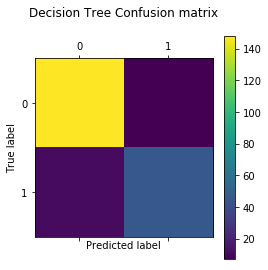

In [65]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
# Show confusion matrix
plt.matshow(cm)
plt.title('Decision Tree Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Running Logistic Regression on the dataset

Accuracy of Training data using Logistic Regression: 0.99
Accuracy of Test data using Logistic Regression: 0.96
[[152   3]
 [  6  51]]


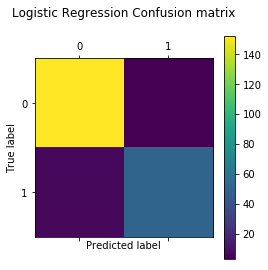

In [66]:
regr_2 = LogisticRegression(solver="liblinear", multi_class="ovr")
regr_2.fit(X_train, y_train)
y_pred_test_lr = regr_2.predict(X_test)
y_pred_train_lr = regr_2.predict(X_train)

print('Accuracy of Training data using Logistic Regression: %.2f' %accuracy_score(y_train, y_pred_train_lr))
print('Accuracy of Test data using Logistic Regression: %.2f' %accuracy_score(y_test, y_pred_test_lr))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test_lr)
print(cm)
# Show confusion matrix
plt.matshow(cm)
plt.title('Logistic Regression Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Running MLP Classifier on the dataset without K-Folds

In [67]:
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=[10,10], max_iter=400, activation='logistic')
mlp.fit(X_train, y_train)

print("Accuracy of Training set using MLP Classifier: %f" % mlp.score(X_train, y_train))
print("Accuracy of Test set using MLP Classifier: %f" % mlp.score(X_test, y_test))

Accuracy of Training set using MLP Classifier: 1.000000
Accuracy of Test set using MLP Classifier: 0.981132


Using K-Fold with MLP Classifier


In [68]:
kf = KFold(n_splits=10)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25,20,20,30,30), random_state=1)
training_score = []
k_size = []

for train_indices, validation_indices in kf.split(X_train,y_train):
    clf.fit(X[train_indices], y_dataset[train_indices])
    print(clf.score(X[validation_indices], y_dataset[validation_indices]))
    

0.92
1.0
0.9795918367346939
1.0
1.0
0.9591836734693877
0.9795918367346939
0.9795918367346939
0.9591836734693877
1.0


In [69]:
y_pred_test = clf.predict(X_test)
print('Accuracy of Test data using k-fold Cross Validation with MLPClassifier: %.2f' %accuracy_score(y_test, y_pred_test))
clf.score(X_test, y_test)

Accuracy of Test data using k-fold Cross Validation with MLPClassifier: 1.00


0.9952830188679245

[[155   0]
 [  1  56]]


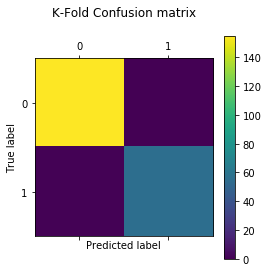

In [70]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
# Show confusion matrix
plt.matshow(cm)
plt.title('K-Fold Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()